# 統計処理のための機能(1)

- 数値データを統計処理する為の基本的な方法
    - 離散的な数値data(整数data)の集計
        - 離散的な数値(整数　:　小数点以下がない整数, マイナスがない整数)

### 整数値(非負)の集計

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4])  # sample data

In [3]:
c = np.bincount(q)
print(c)

[5 4 3 2 1]


### 度数が最も多い要素を求める
- bincount は整数の度数分布を取得したモノ

In [4]:
np.argmax(c)  # data値の中で最大値を求める

0

### 度数が最も少ない要素を求める

In [5]:
np.argmin(c)  # data値の中で最小値を求める

4

## 数値dataを統計処理するための基本的な方法(2)
- 連続値(浮動小数点)のdataの集計
- 平均値, 分散,　標準偏差 etc...

### 基本的な統計量の算出

In [6]:
np.random.seed(0)
r = np.random.normal(5, 2, 100000)

### 最大値・最小値
- 統計処理で一番最初にすべき事

In [7]:
print(r.max())
print(r.min())

13.483543825807393
-4.704235306360234


### 平均値・分散・標準偏差
- 分散は標準偏差の２乗になっている

In [8]:
print(r.mean()) # mean(平均を意味する)
print(r.var())  # 分散
print(r.std())  # 標準偏差

5.003153401016251
3.9787458116624754
1.9946793756547632


- 上記で設定した値に近くなっている
    - r　=　np . random . normal <u>(5, 2, 100000)</u>
    - 若干の誤差はあるが設定した値にかなり近い

### 不偏分散・不偏標準偏差(母集団の推定に用いる)
- <u>母集団</u>
    - 非常に大きな母集団から、少数の　sample　を抜き出して少数の　sample　から得られた統計値から全体の集団(母集団)を推定する

- <u>何が起こるのか？</u>
    - 少数(小さい方に偏る)から得られた　sample　（標準偏差）は、若干少数(小さい方に偏る)性質がある


- <u>不偏分散の方がただの分散より若干大きくなっている</u>

In [9]:
print(r.var(ddof=1))
print(r.std(ddof=1))

3.9787855995184707
1.9946893491264424


## まとめ
- <u>離散的な値(整数など)の個数の集計</u>
    - **c　=　np.bincount(整数の配列)**　「indexが意味する値の集計値」の配列を　**c**　に得る
    - ** np.bincount　の戻り値から,値の出現頻度が最小のモノと最大のモノを求める方法
        - **np.argmin(c)**　:　出現回数が最小の値を求める
        - **np.argmax(c)**　:　出現回数が最大の値(最頻値　:　モード)を求める

    
- <u>連続的な値(浮動小数点数)の統計処理</u>
    - 平均値　:　配列 . mean()
    - 分散　:　配列 . var()
    - 不偏分散　:　配列 . var(ddof=1)
    - 標準偏差　:　配列 . std()
    - 不偏標準偏差　:　配列 .std(ddof=1)

# 統計処理のための機能(2)

### 区間毎のdataの集計
- data の度数分布を調べる為の各種の方法


- <u>matplotlibのhist関数(ヒストグラム作成関数)を用いた集計手法</u>
    - 集計結果をグラフとして返してくれる
    - 目で見てどの区間にどのdataがあるのか確認ができる


- <u>NumPyのAPIを用いた集計方法</u>

### 区間毎の集計（度数分布）

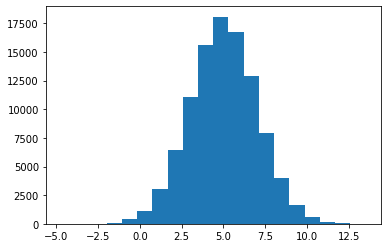

In [10]:
g = plt.hist(r, bins=20)

- このデータでは具体的にどのdataが何処にどのくらいあるのか分からない

### 集計結果をdataとして使用する

In [12]:
g

(array([3.0000e+00, 2.0000e+00, 2.3000e+01, 9.9000e+01, 4.0900e+02,
        1.1490e+03, 3.0180e+03, 6.4130e+03, 1.1081e+04, 1.5631e+04,
        1.8079e+04, 1.6767e+04, 1.2937e+04, 7.9430e+03, 4.0020e+03,
        1.6830e+03, 5.5600e+02, 1.5800e+02, 4.0000e+01, 7.0000e+00]),
 array([-4.70423531, -3.79484635, -2.88545739, -1.97606844, -1.06667948,
        -0.15729052,  0.75209843,  1.66148739,  2.57087635,  3.4802653 ,
         4.38965426,  5.29904322,  6.20843217,  7.11782113,  8.02721009,
         8.93659904,  9.845988  , 10.75537696, 11.66476591, 12.57415487,
        13.48354383]),
 <BarContainer object of 20 artists>)

- g[ index=1 ]　->　横軸(区間の境界値)

In [13]:
g[1]

array([-4.70423531, -3.79484635, -2.88545739, -1.97606844, -1.06667948,
       -0.15729052,  0.75209843,  1.66148739,  2.57087635,  3.4802653 ,
        4.38965426,  5.29904322,  6.20843217,  7.11782113,  8.02721009,
        8.93659904,  9.845988  , 10.75537696, 11.66476591, 12.57415487,
       13.48354383])

- g[ index=0 ]　->　縦軸(度数の並び=集計結果)

In [14]:
g[0]

array([3.0000e+00, 2.0000e+00, 2.3000e+01, 9.9000e+01, 4.0900e+02,
       1.1490e+03, 3.0180e+03, 6.4130e+03, 1.1081e+04, 1.5631e+04,
       1.8079e+04, 1.6767e+04, 1.2937e+04, 7.9430e+03, 4.0020e+03,
       1.6830e+03, 5.5600e+02, 1.5800e+02, 4.0000e+01, 7.0000e+00])

### NumPy の機能を利用して度数を集計
- 図を介する事なく、配列の処理だけで度数分布をする事ができる

In [16]:
b = np.linspace(r.min(), r.max(), 21)  # 区間の配列　＝　横軸（区間の境界値）
print(b)

[-4.70423531 -3.79484635 -2.88545739 -1.97606844 -1.06667948 -0.15729052
  0.75209843  1.66148739  2.57087635  3.4802653   4.38965426  5.29904322
  6.20843217  7.11782113  8.02721009  8.93659904  9.845988   10.75537696
 11.66476591 12.57415487 13.48354383]


In [17]:
c = np.digitize(r, bins=b)  # 離散化, 区間の何番目に元のdataがあるのかlabel付けをするもの = 各データが属する区間を調べる
print(r[:5])
print(c[:5])

[8.52810469 5.80031442 6.95747597 9.4817864  8.73511598]
[15 12 13 16 15]


#### digitize(　)　:　関数（デジタイズ）
- ヒストグラムを記述した時に元のdata数値は何処に当てはまるのか？を紐付け(label付け)して配列で返してくれる

### label付されたモノを区間毎で集計する

In [18]:
s = np.bincount(c)
print(s)

[    0     3     2    23    99   409  1149  3018  6413 11081 15631 18079
 16767 12937  7943  4002  1683   556   158    40     6     1]


- 区間を 20 段階に区切っている

- <u>何個のdataがその区間に属しているのかを個数で表してくれる</u>

- なんで最初の区間は 0 なのか？
    - data の対象値未満の値のモノがあるのか？
        - 最小値未満のところには値はないので、0と表示される

- **本当に度数集計で必要になるのは 3 以降の区間の値**

In [19]:
len(s)

22

- <u>なぜ区間が１つ増えたのか</u>
    - 上記で説明した内容の処理が起こったのでそのようになった

###　棒グラフで表示させる

ValueError: shape mismatch: objects cannot be broadcast to a single shape

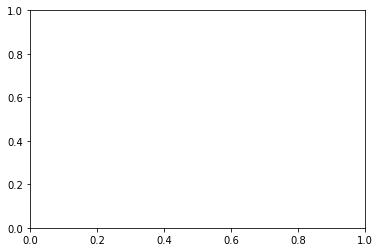

In [20]:
plt.bar(b, s)

- bincount()で処理すると最小値未満の区間も入ってしまう為
    - b = 21個
    - s = 22個
        - **個数が対応していない**

<BarContainer object of 21 artists>

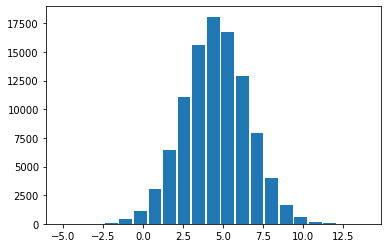

In [21]:
plt.bar(b, s[1:])

## まとめ
- <u>matplotlibのhist関数(ヒストグラム描画関数)の集計機能</u>
    - 手軽な方法
    - **g = plt.hist (配列, bins=階級の数)**
    - g[ 1 ]　:　区間の境界の並び（横軸）
    - g[ 0 ]　:　区間毎の度数の並び(各区間に対するdataの個数)


- <u>NumPyのdegitize関数で集計する</u>
    - b　=　np.linspace( )　:　区間の境界の並び（階級の区切り）
    - c　=　np.digitize(配列, bins=b)　:　データに対する**区間毎のindex**の並び(label付け＝変換)
    - s　=　np.bincount(c)　:　区間毎の度数の並び（その区間に何個のdataが含まれているか個数を表してくれる）
    - 上記 b に対する「配列」の度数分布が s に得られる
    
    
- <u>hist関数と　digitize 関数では**区間の捉え方**が少し異なる</u>

# 統計処理の為の機能(3)
### 各種の代表値について
- 「代表値」　:　データ全体を要約する値
    - 平均値　=　標本値の合計　÷　標本の数
    - 中央値　=　標本の値を昇順に並べた場合に、標本数を二分する値　:　メディアン
        - dataが偶数個の場合は、中央に近い2つの値の平均値
    - 最頻値　=　標本数が最も多く集中する(度数が最大の)区間　:　モード
        - (区間の中央)

### 各種の代表値

### 平均値

In [22]:
r.mean()

5.003153401016251

### 中央値

In [23]:
# クアンタイル :　四分因数　-> 順番に並べた時に(25%, 50%, 75%, 100%)示す point
np.quantile(r, 0.5)  # 集計対象data　:　何割含む所までpointするか(比率)　:　　

5.003440444171162

### 最頻値

In [24]:
np.argmax(g[0]) # argmax()　: アーグマックス　/ 最大値を保持している位置はどこか？を求める

10

In [25]:
g[1][10]

4.38965425972358

In [26]:
# 区間の始点と終点を足して割る　-> 区間のど真ん中が求まる
(g[1][10] + g[1][11])/2

4.8443487380277706

#### 結論　:　正規乱数では、平均値、中央値、最頻値は全て(ほぼ)同じ値

## 対数正規分布
- しばしば見られる。かなり歪んでいる分布

In [27]:
np.random.seed(0)
lgn = np.random.lognormal(0, 0.5, 100000)

In [28]:
print(lgn[:10])

[2.41578956 1.22149877 1.63128654 3.06622327 2.5441052  0.61346078
 1.60808529 0.92711413 0.94969972 1.22789246]


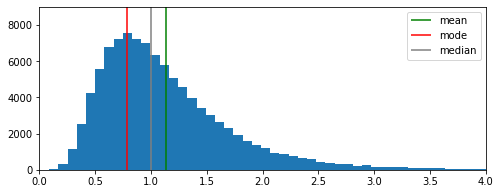

In [46]:
plt.figure(figsize=(8, 3))
h = plt.hist(lgn, bins=100)
plt.xlim(0, 4)
plt.ylim(0, 9000)
plt.vlines(lgn.mean(), 0,9000, color='green', label='mean') # 縦棒を入れる ->　平均値（green）
plt.vlines((h[1][8] + h[1][9])/2, 0,9000, color='red', label='mode') # 縦棒を入れる ->　最頻値（red）
plt.vlines(np.quantile(lgn, 0.5), 0,9000, color='gray', label='median') # 縦棒を入れる ->　中央値(gray)
plt.legend()

In [34]:
# 平均値
lgn.mean()

1.1331766683644917

In [36]:
# 最頻値
np.argmax(h[0]) # 度数が最も大きい区間の index

8

#### histグラム 8番目の index が最も大きい

In [42]:
(h[1][8] + h[1][9])/2

0.7896461559375212

#### 約８番目がグラフのピークになっている
- 最頻値

In [43]:
# 中央値 | クアンタイル :　四分因数　-> 順番に並べた時に(25%, 50%, 75%, 100%)示す point
np.quantile(lgn, 0.5)

1.0008604810805255

### 対数正規分布　（歪みの例）
- 経済現象を色々統計を取るとよく見られる分布
    - 国民世帯あたりの年収・保有資産
    - 全国で調査して度数分布を取ると、**対数正規分布になる**


- <u>経済的な特徴を見るための指標にもなる</u>

## まとめ
- <u>配列の平均値</u>
    - **配列.mean( )**　:　配列の平均値
    - **配列.quantile(配列, 要素数の比率)**　:　配列のパーセント点（全要素の何％を占める要素は、どの階級なのかどの位置なのか？）
        - 統計処理を手がけるようになるとすごく重要になってくる
        - 「要素数の比率」に0.5を与えると<u>中央値</u>を得る
        - 中央値 | クアンタイル :　四分因数　-> 順番に並べた時に(25%, 50%, 75%, 100%)示す point


- <u>最頻値の算出</u>
    - 1. 度数が最大の区間の index を取得する
        - np.argmax(度数分布の配列)
    - 2. 上記の index 位置と区間の配列から最頻値を判断する
        - 区間の開始 ~ 次の区間の開始　を足して / 2 で割ると、最大区間の中央の値が算出される

# 統計処理の為の機能(4)

### 質的データ(カテゴリーデータ)の扱い
- 非数値のデータ(文字列など)の集計処理

### カテゴリーdataの扱い

In [ ]:
# sample data読み込み
fruits = np.loadtxt('fruits.csv', )  # キーワード引数の記述の順番は大切